# Workout Vids Landmark Detection

## Mediapipe Docs
* [Setup](https://ai.google.dev/edge/mediapipe/solutions/setup_python)
* [Pose Landmarker](https://ai.google.dev/edge/mediapipe/solutions/vision/pose_landmarker/python)
* [Code Example](https://github.com/google-ai-edge/mediapipe-samples/blob/main/examples/pose_landmarker/python/%5BMediaPipe_Python_Tasks%5D_Pose_Landmarker.ipynb)
* [Models](https://ai.google.dev/edge/mediapipe/solutions/vision/pose_landmarker)

## VLC Tips
* [Keyboard Shortcuts](https://wiki.videolan.org/QtHotkeys/)
    * `E` to move one frame forward and
    * `+` and `-` to move faster/slower
    * `space` for pause
    * `Shift + [Left/Right] Arrow` to jump 5 seconds back/forward
* Go to `Video > Take Snapshot` to take a photo
    * These are saved in `~/Pictures`
 
## Reference Papers
* [BlazePose](https://arxiv.org/pdf/2006.10204)
    * The basis for pose recognition

In [9]:
import numpy as np
from pathlib import Path
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2
import matplotlib.pyplot as plt

img_wd = Path('landmark_images')
models_wd = Path('..') / 'data' / 'models'

%matplotlib inline

# Prepare Data

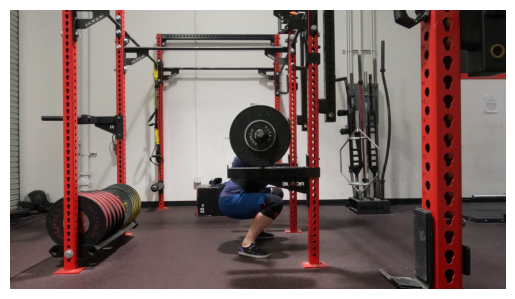

In [40]:
img_fp = img_wd / 'Squat Bottom.png'
mp_image = mp.Image.create_from_file(str(img_fp))

ax = plt.imshow(mp_image.numpy_view())
ax.axes.set_axis_off()
ax

# Task

## Set Task Options

In [41]:
model_path = models_wd / 'pose_landmarker_full.task'

BaseOptions = mp.tasks.BaseOptions
PoseLandmarker = mp.tasks.vision.PoseLandmarker
PoseLandmarkerOptions = mp.tasks.vision.PoseLandmarkerOptions
VisionRunningMode = mp.tasks.vision.RunningMode

options = PoseLandmarkerOptions(
    base_options=BaseOptions(model_asset_path=model_path),
    running_mode=VisionRunningMode.IMAGE)

## Run Task

In [42]:
with PoseLandmarker.create_from_options(options) as landmarker:
    pose_landmarker_result = landmarker.detect(mp_image)

I0000 00:00:1728168500.893162   72649 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1728168500.972096   80925 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 560.35.03), renderer: NVIDIA GeForce RTX 3090/PCIe/SSE2
W0000 00:00:1728168501.024086   80930 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1728168501.054255   80939 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
/home/brendan/anaconda3/envs/workouts/lib/python3.12/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


## Visual Annotated Result

This is from the above code example

In [43]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2

In [44]:
def draw_landmarks_on_image(rgb_image, detection_result):
    pose_landmarks_list = detection_result.pose_landmarks
    annotated_image = np.copy(rgb_image)
    
    # Loop through the detected poses to visualize.
    for idx in range(len(pose_landmarks_list)):
        pose_landmarks = pose_landmarks_list[idx]
    
        # Draw the pose landmarks.
        pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
        pose_landmarks_proto.landmark.extend([
          landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
        ])
        solutions.drawing_utils.draw_landmarks(
          annotated_image,
          pose_landmarks_proto,
          solutions.pose.POSE_CONNECTIONS,
          solutions.drawing_styles.get_default_pose_landmarks_style())
    return annotated_image

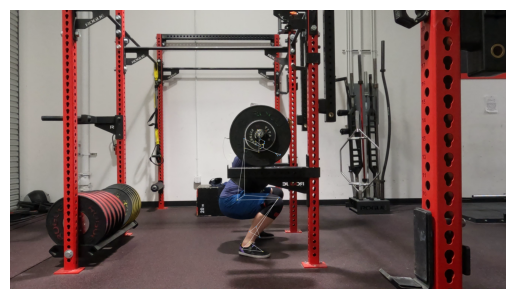

In [46]:
annotated_img = draw_landmarks_on_image(mp_image.numpy_view(), pose_landmarker_result)

ax = plt.imshow(annotated_img)
ax.axes.set_axis_off()

annotated_img_fp = img_wd / 'Squat Bottom (Annotated).png'
cv2.imwrite(annotated_img_fp, cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))

ax

# Landmark Analysis

In [53]:
right_hip = pose_landmarker_result.pose_landmarks[0][24]
right_knee = pose_landmarker_result.pose_landmarks[0][26]
right_hip, right_knee

(NormalizedLandmark(x=0.4574584364891052, y=0.681267261505127, z=-0.08356993645429611, visibility=0.9995495676994324, presence=0.9990880489349365),
 NormalizedLandmark(x=0.5392013788223267, y=0.6774954199790955, z=-0.14791777729988098, visibility=0.8997349739074707, presence=0.9979273080825806))

In [56]:
right_hip.y, right_knee.y, (right_hip.y / right_knee.y - 1) * 100

(0.681267261505127, 0.6774954199790955, 0.5567331401513886)